In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [6]:
x=data.iloc[:,0:4]
x

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17
...,...,...,...,...
195,196,0,35,120
196,197,0,45,126
197,198,1,32,126
198,199,1,32,137


In [8]:
y=data.iloc[:,-1:]
y

,Spending Score (1-100)
0,39
1,81
2,6
3,77
4,40
...,...
195,79
196,28
197,74
198,18


In [11]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)

In [13]:
sc_x.shape

(200, 4)

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(sc_x,y,test_size=0.2,random_state=42)
print('Training Data Shape')
print()
print('Training data-X- shape:\t',xtrain.shape)
print()
print('Training data-Y- shape:\t',ytrain.shape)
print('Testing Data Shape')
print()
print('Testing data(X-Input) shape:\t',xtest.shape)
print()
print('Testing data(Y-Input) shape:\t',ytest.shape)

Training Data Shape

Training data-X- shape:	 (160, 4)

Training data-Y- shape:	 (160, 1)
Testing Data Shape

Testing data(X-Input) shape:	 (40, 4)

Testing data(Y-Input) shape:	 (40, 1)


In [18]:
knn_model=KNeighborsClassifier(n_neighbors=3)
print('***KNN Classifier Model********')
print('Training Phase\n')
knn_model. fit (xtrain, ytrain)
print('Training is completed')
print('='*100)
print()
print('Testing Phase\n')
ypred=knn_model.predict(xtest)
print('Prdicted Class Labels are: \n',ypred)
print('Test is also done')
print()
print('='*100)

***KNN Classifier Model********
Training Phase

Training is completed

Testing Phase

Prdicted Class Labels are: 
 [41 66  3  1 46 42 42 10  5 47 42 20 27 41 16 63 45  7 51 41 42  6 72 42
 41 46 41 49 71 40  6  3 46 55 20 42 40 90 15 42]
Test is also done



C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [19]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification report :\n',classification_report(ytest,ypred))

Accuracy Score:	 0.025

Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1


C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

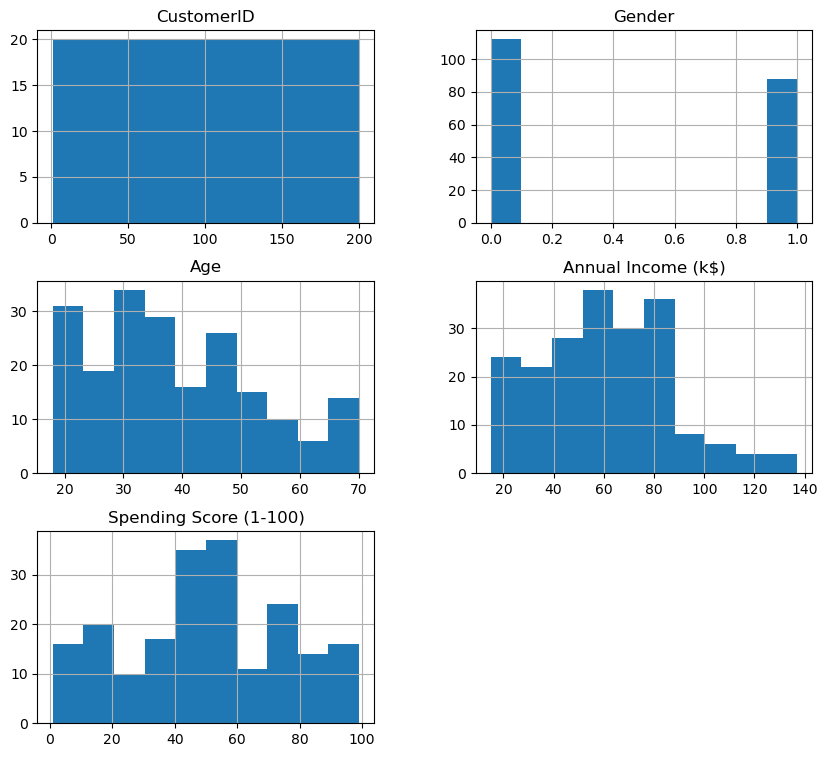

In [21]:
data.hist(figsize=(10,9))


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [3, 5, 7, 9]
results = {}

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(xtrain, ytrain)
    y_pred = knn_model.predict(xtest)
    print(f"Prdicted Class Labels for K-value {k}: {ypred}")
    print()
    accuracy = accuracy_score(ytest, y_pred)
    results[k] = accuracy

for k, accuracy in results.items():
    print(f"K={k}: Accuracy = {accuracy}")

Prdicted Class Labels for K-value 3: [41 66  3  1 46 42 42 10  5 47 42 20 27 41 16 63 45  7 51 41 42  6 72 42
 41 46 41 49 71 40  6  3 46 55 20 42 40 90 15 42]

Prdicted Class Labels for K-value 5: [41 66  3  1 46 42 42 10  5 47 42 20 27 41 16 63 45  7 51 41 42  6 72 42
 41 46 41 49 71 40  6  3 46 55 20 42 40 90 15 42]

Prdicted Class Labels for K-value 7: [41 66  3  1 46 42 42 10  5 47 42 20 27 41 16 63 45  7 51 41 42  6 72 42
 41 46 41 49 71 40  6  3 46 55 20 42 40 90 15 42]

Prdicted Class Labels for K-value 9: [41 66  3  1 46 42 42 10  5 47 42 20 27 41 16 63 45  7 51 41 42  6 72 42
 41 46 41 49 71 40  6  3 46 55 20 42 40 90 15 42]

K=3: Accuracy = 0.025
K=5: Accuracy = 0.05
K=7: Accuracy = 0.025
K=9: Accuracy = 0.025


C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was

# Medical Diagnosis with Naive Bayes


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data=pd.read_csv('Disease_symptom_and_patient_profile_dataset1.csv')
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Blood Pressure,Cholesterol Level,Age,Gender,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,Low,Normal,19,Female,Positive
1,Common Cold,No,Yes,Yes,No,Normal,Normal,25,Female,Negative
2,Eczema,No,Yes,Yes,No,Normal,Normal,25,Female,Negative
3,Asthma,Yes,Yes,No,Yes,Normal,Normal,25,Male,Positive
4,Asthma,Yes,Yes,No,Yes,Normal,Normal,25,Male,Positive


In [13]:
data.isna().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Blood Pressure          0
Cholesterol Level       0
Age                     0
Gender                  0
Outcome Variable        0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Disease']=le.fit_transform(data['Disease'])
data['Fever']=le.fit_transform(data['Fever'])
data['Cough']=le.fit_transform(data['Cough'])
data['Fatigue']=le.fit_transform(data['Fatigue'])
data['Difficulty Breathing']=le.fit_transform(data['Difficulty Breathing'])
data['Blood Pressure']=le.fit_transform(data['Blood Pressure'])
data['Cholesterol Level']=le.fit_transform(data['Cholesterol Level'])
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Blood Pressure,Cholesterol Level,Age,Gender,Outcome Variable
0,56,1,0,1,1,1,2,19,Female,Positive
1,24,0,1,1,0,2,2,25,Female,Negative
2,37,0,1,1,0,2,2,25,Female,Negative
3,6,1,1,0,1,2,2,25,Male,Positive
4,6,1,1,0,1,2,2,25,Male,Positive


In [15]:
x=data.iloc[:,0:8]
x

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Blood Pressure,Cholesterol Level,Age
0,56,1,0,1,1,1,2,19
1,24,0,1,1,0,2,2,25
2,37,0,1,1,0,2,2,25
3,6,1,1,0,1,2,2,25
4,6,1,1,0,1,2,2,25
...,...,...,...,...,...,...,...,...
344,101,1,0,1,0,0,0,80
345,101,1,0,1,0,0,0,85
346,101,1,0,1,0,0,0,85
347,101,1,0,1,0,0,0,90


In [16]:
y=data.iloc[:,-1:]
y

,Outcome Variable
0,Positive
1,Negative
2,Negative
3,Positive
4,Positive
...,...
344,Positive
345,Positive
346,Positive
347,Positive


array([[<Axes: title={'center': 'Disease'}>,
        <Axes: title={'center': 'Fever'}>,
        <Axes: title={'center': 'Cough'}>],
       [<Axes: title={'center': 'Fatigue'}>,
        <Axes: title={'center': 'Difficulty Breathing'}>,
        <Axes: title={'center': 'Blood Pressure'}>],
       [<Axes: title={'center': 'Cholesterol Level'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

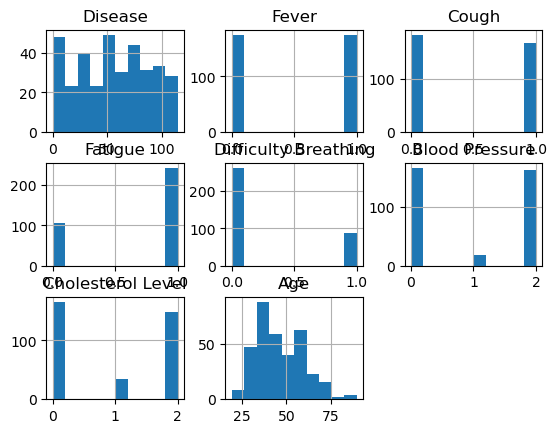

In [17]:
data.hist()

In [20]:
data.describe()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Blood Pressure,Cholesterol Level,Age
count,349.000000,349.000000,349.000000,349.00000,349.000000,349.000000,349.000000,349.000000
mean,55.326648,0.501433,0.478510,0.69341,0.252149,0.991404,0.951289,46.323782
std,33.205852,0.500716,0.500255,0.46174,0.434870,0.975231,0.950154,13.085090
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,19.000000
25%,27.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,35.000000
50%,56.000000,1.000000,0.000000,1.00000,0.000000,1.000000,1.000000,45.000000
75%,81.000000,1.000000,1.000000,1.00000,1.000000,2.000000,2.000000,55.000000
max,115.000000,1.000000,1.000000,1.00000,1.000000,2.000000,2.000000,90.000000


In [21]:
data.corr()

C:\Users\eluri\AppData\Local\Temp\ipykernel_20888\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Blood Pressure,Cholesterol Level,Age
Disease,1.000000,-0.002448,0.010284,0.040286,-0.232577,-0.099918,-0.054596,0.173154
Fever,-0.002448,1.000000,0.129183,-0.078882,0.262273,-0.208880,0.087727,-0.011255
Cough,0.010284,0.129183,1.000000,-0.171669,0.223115,0.079136,0.061270,-0.104511
Fatigue,0.040286,-0.078882,-0.171669,1.000000,0.071267,-0.095209,-0.086536,0.103989
Difficulty Breathing,-0.232577,0.262273,0.223115,0.071267,1.000000,0.039004,0.099356,-0.207296
Blood Pressure,-0.099918,-0.208880,0.079136,-0.095209,0.039004,1.000000,0.309659,-0.107419
Cholesterol Level,-0.054596,0.087727,0.061270,-0.086536,0.099356,0.309659,1.000000,-0.196572
Age,0.173154,-0.011255,-0.104511,0.103989,-0.207296,-0.107419,-0.196572,1.000000


<Axes: >

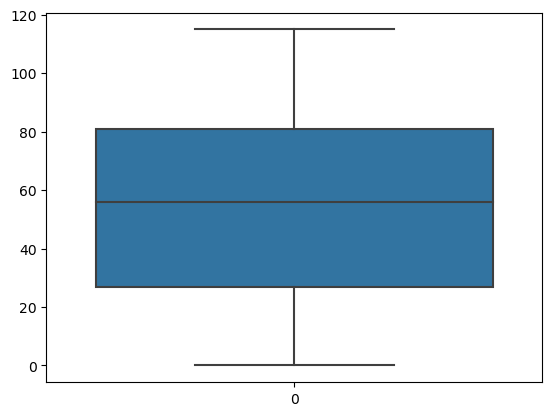

In [48]:
sns.boxplot(data["Diseas

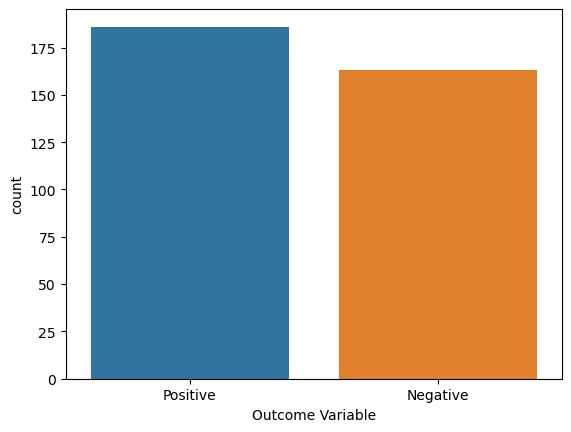

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='Outcome Variable')

plt.show()

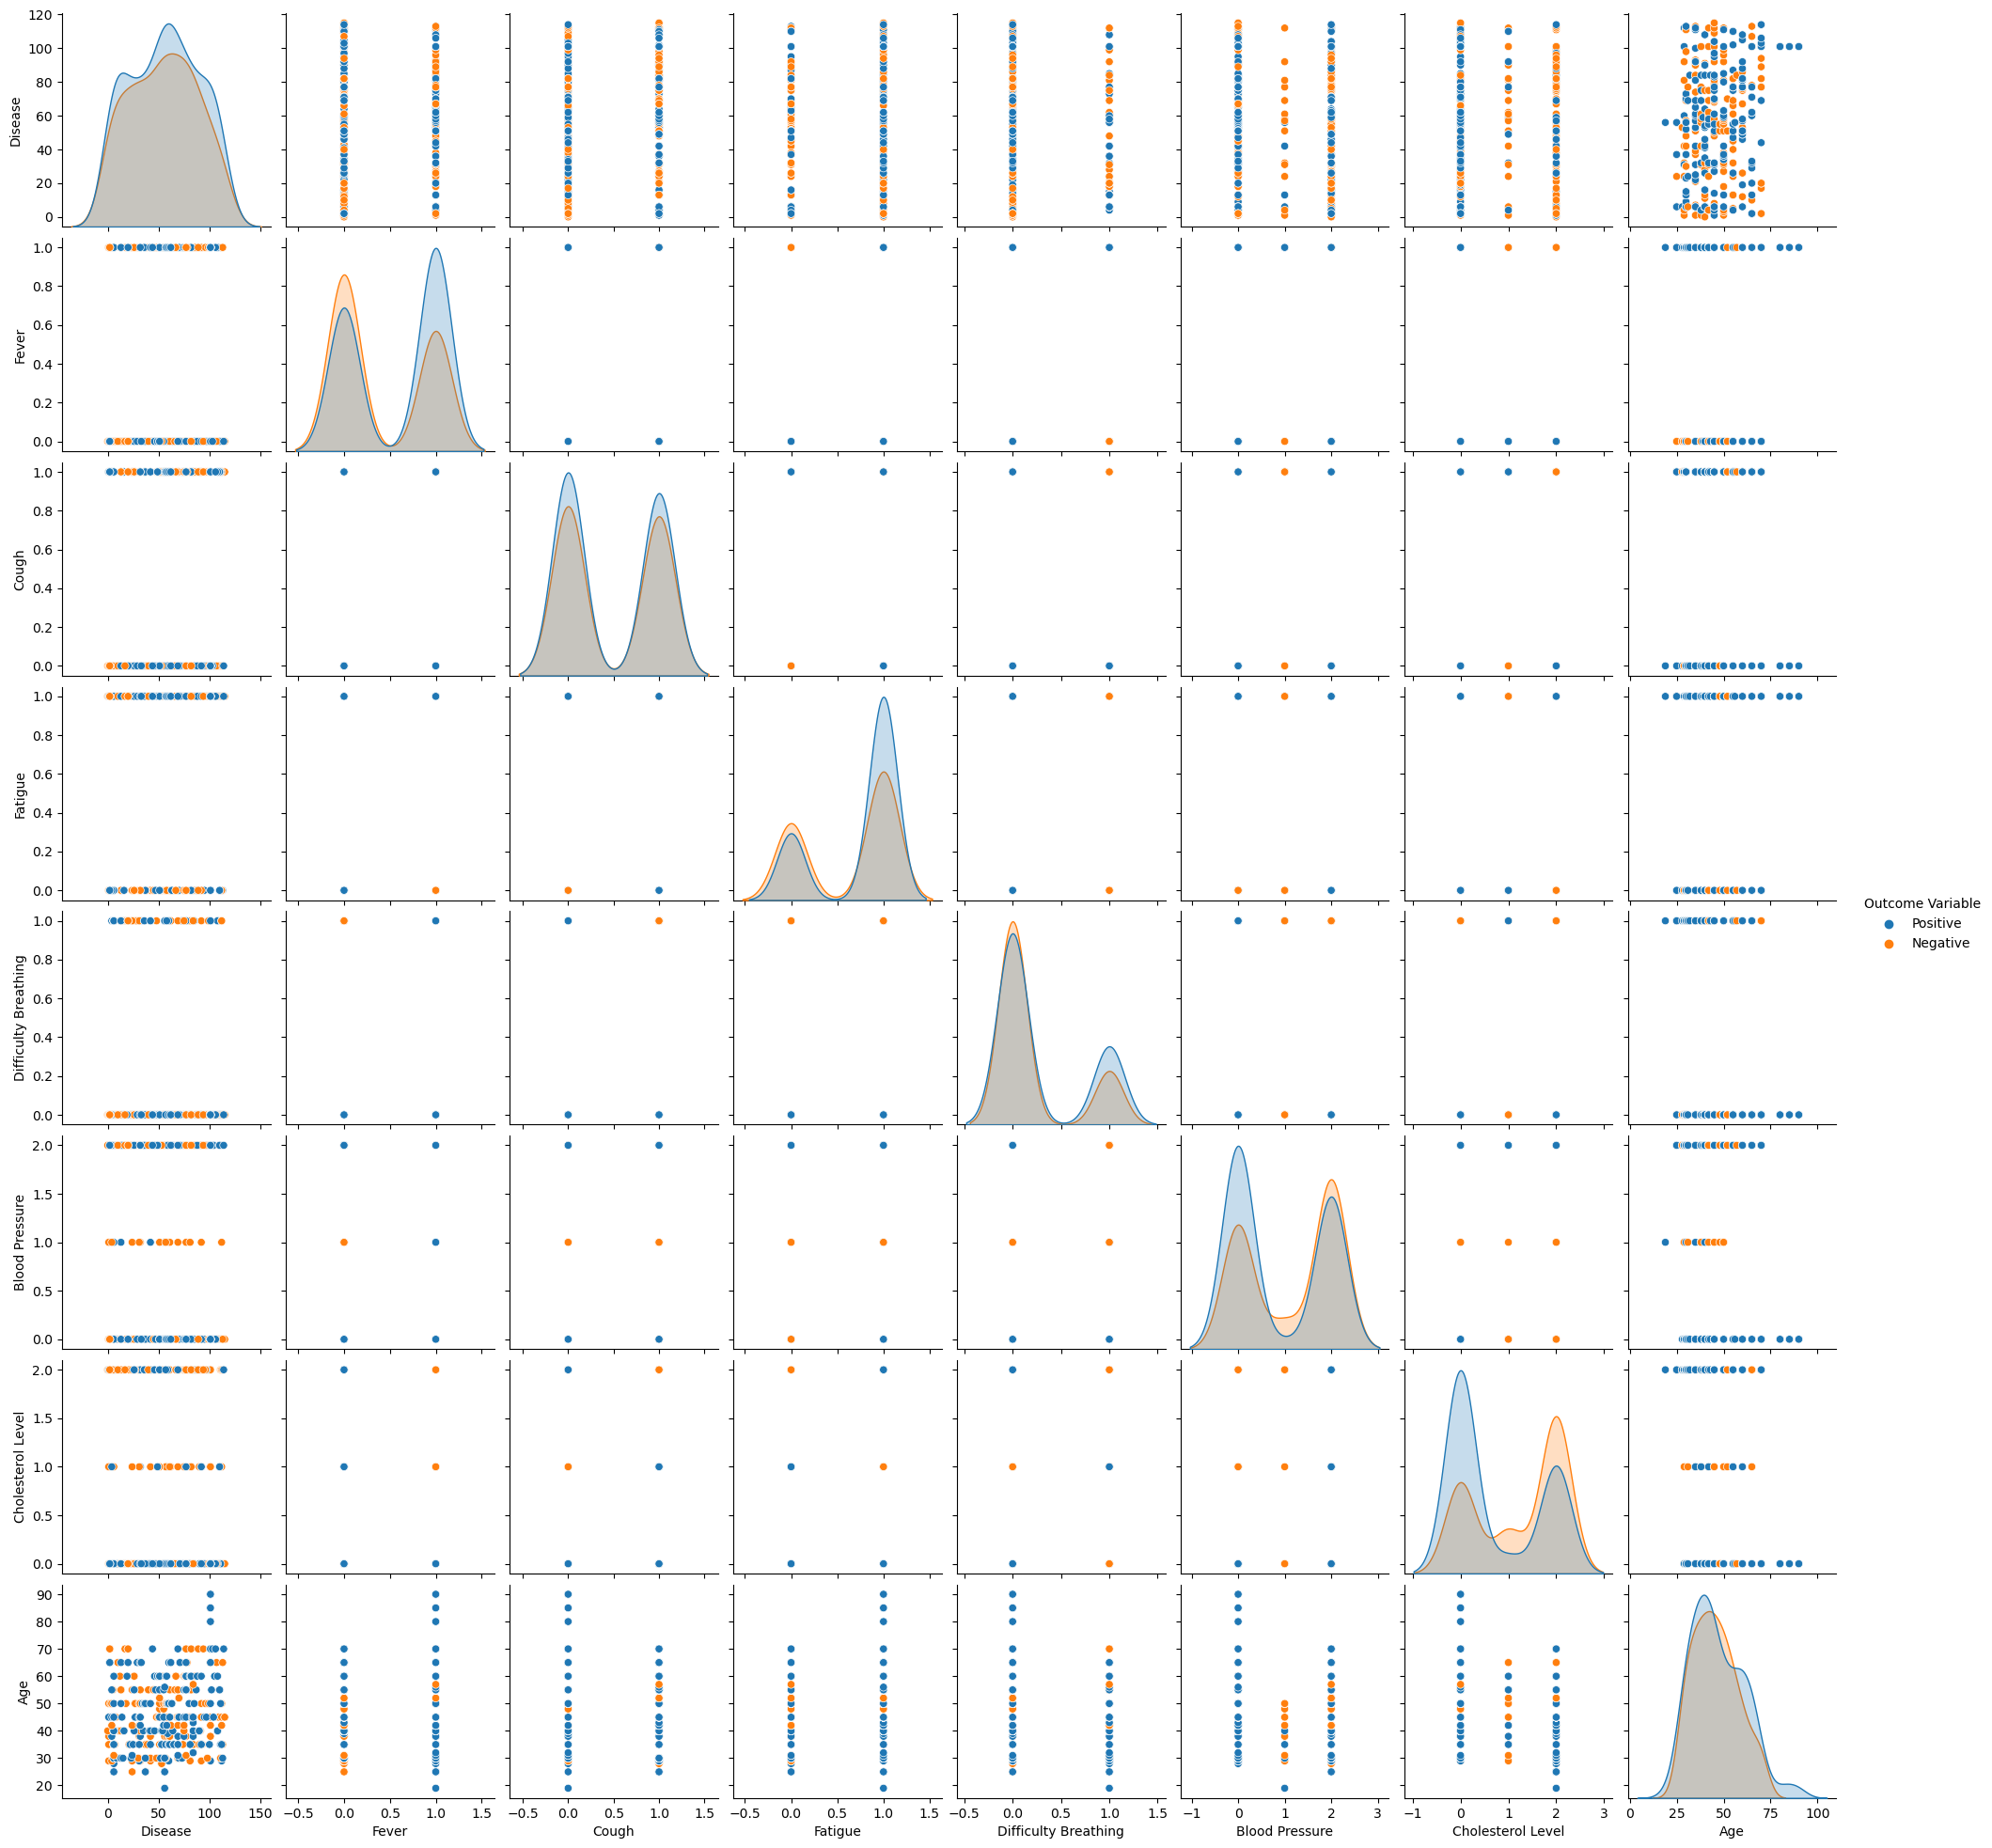

In [34]:
sns.pairplot(data,hue="Outcome Variable")

Skew:  -0.003787853427695127

Kurthosis:  <bound method NDFrame._add_numeric_operations.<locals>.kurt of 0       56
1       24
2       37
3        6
4        6
      ... 
344    101
345    101
346    101
347    101
348    101
Name: Disease, Length: 349, dtype: int32>


C:\Users\eluri\AppData\Local\Temp\ipykernel_20888\3024773914.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Disease"])


<Axes: xlabel='Disease', ylabel='Density'>

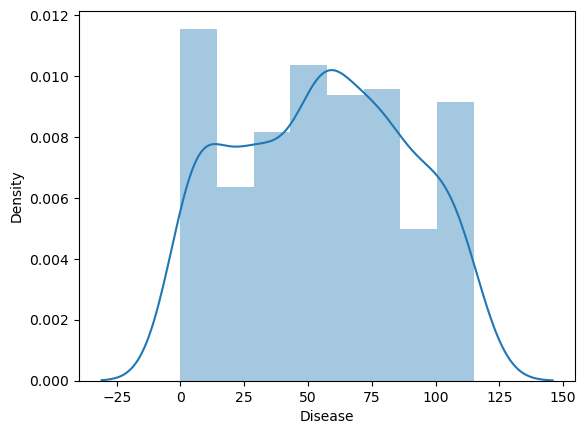

In [35]:
from scipy.stats import skew,kurtosis
print("Skew: ",data["Disease"].skew())
print()
print("Kurthosis: ",data["Disease"].kurtosis)
sns.distplot(data["Disease"])

Skew:  -0.005755449029988017

Kurthosis:  <bound method NDFrame._add_numeric_operations.<locals>.kurt of 0      1
1      0
2      0
3      1
4      1
      ..
344    1
345    1
346    1
347    1
348    1
Name: Fever, Length: 349, dtype: int32>


C:\Users\eluri\AppData\Local\Temp\ipykernel_20888\525313317.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Fever"])


<Axes: xlabel='Fever', ylabel='Density'>

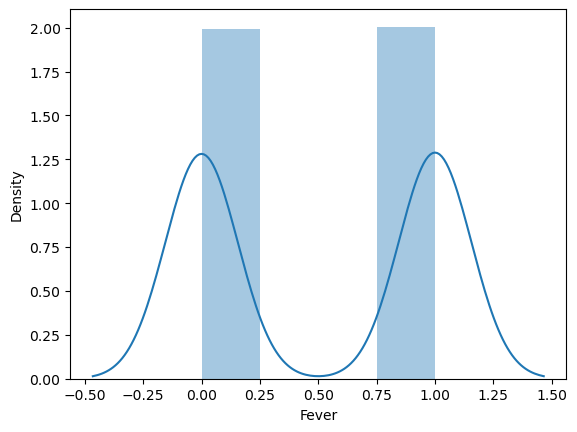

In [36]:
from scipy.stats import skew,kurtosis
print("Skew: ",data["Fever"].skew())
print()
print("Kurthosis: ",data["Fever"].kurtosis)
sns.distplot(data["Fever"])

Skew:  0.08641123061901233

Kurthosis:  <bound method NDFrame._add_numeric_operations.<locals>.kurt of 0      0
1      1
2      1
3      1
4      1
      ..
344    0
345    0
346    0
347    0
348    0
Name: Cough, Length: 349, dtype: int32>


C:\Users\eluri\AppData\Local\Temp\ipykernel_20888\1272503791.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Cough"])


<Axes: xlabel='Cough', ylabel='Density'>

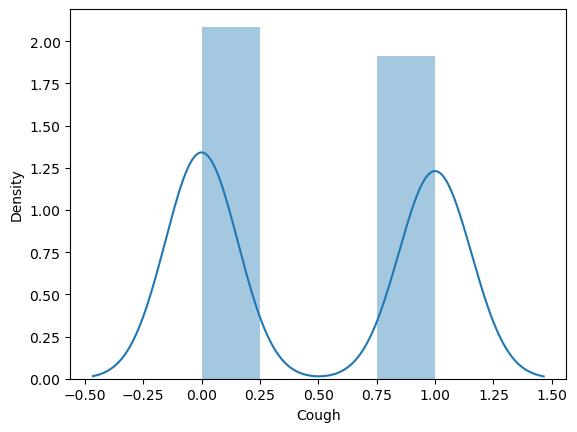

In [40]:
from scipy.stats import skew,kurtosis
print("Skew: ",data["Cough"].skew())
print()
print("Kurthosis: ",data["Cough"].kurtosis)
sns.distplot(data["Cough"])

Skew:  -0.8425720671000645

Kurthosis:  <bound method NDFrame._add_numeric_operations.<locals>.kurt of 0      1
1      1
2      1
3      0
4      0
      ..
344    1
345    1
346    1
347    1
348    1
Name: Fatigue, Length: 349, dtype: int32>


C:\Users\eluri\AppData\Local\Temp\ipykernel_20888\3488428353.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Fatigue"])


<Axes: xlabel='Fatigue', ylabel='Density'>

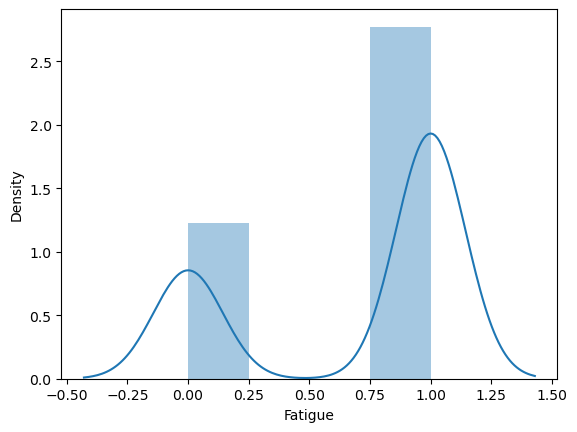

In [38]:
from scipy.stats import skew,kurtosis
print("Skew: ",data["Fatigue"].skew())
print()
print("Kurthosis: ",data["Fatigue"].kurtosis)
sns.distplot(data["Fatigue"])

Skew:  0.5674050307810211

Kurthosis:  <bound method NDFrame._add_numeric_operations.<locals>.kurt of 0      19
1      25
2      25
3      25
4      25
       ..
344    80
345    85
346    85
347    90
348    90
Name: Age, Length: 349, dtype: int64>


C:\Users\eluri\AppData\Local\Temp\ipykernel_20888\3180014433.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"])


<Axes: xlabel='Age', ylabel='Density'>

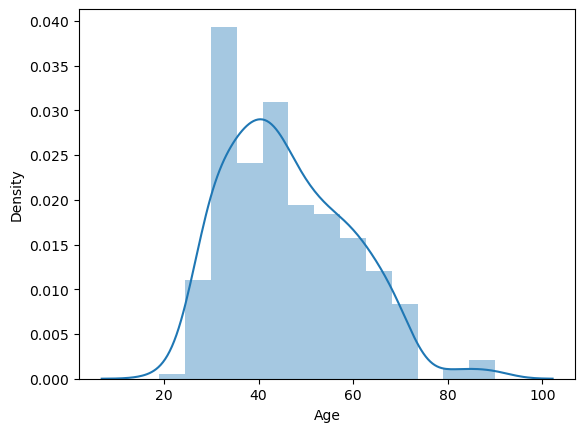

In [39]:
from scipy.stats import skew,kurtosis
print("Skew: ",data["Age"].skew())
print()
print("Kurthosis: ",data["Age"].kurtosis)
sns.distplot(data["Age"])

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)

In [30]:
xtrain.shape

(279, 8)

In [31]:
ytrain.shape

(279, 1)

In [32]:
from sklearn.naive_bayes import GaussianNB
gauss_nb=GaussianNB()
gauss_nb.fit(xtrain, ytrain)

print('Training completed....')
print()

ypred=gauss_nb.predict(xtest)
print('Testing is done')

 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('='*60)
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*60)
print()     
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*60)
print()     
print('Classification Report: \n',classification_report (ytest,ypred))
print('='*60)     

Training completed....

Testing is done
Accuracy Score:	
 0.5571428571428572


Confusion Matrix:
 [[17 13]
 [18 22]]


Classification Report: 
               precision    recall  f1-score   support

    Negative       0.49      0.57      0.52        30
    Positive       0.63      0.55      0.59        40

    accuracy                           0.56        70
   macro avg       0.56      0.56      0.55        70
weighted avg       0.57      0.56      0.56        70



C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
